In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SCC's in Erdős–Rényi digraphs

In [5]:
data = dict()
for n in [10, 100, 1000]:
    new_data = pd.concat([pd.read_csv(f"csv/ER_{n}_{i}.csv") for i in range(1,10)])
    new_data = new_data.groupby(by="p").mean()
    data[n] = new_data

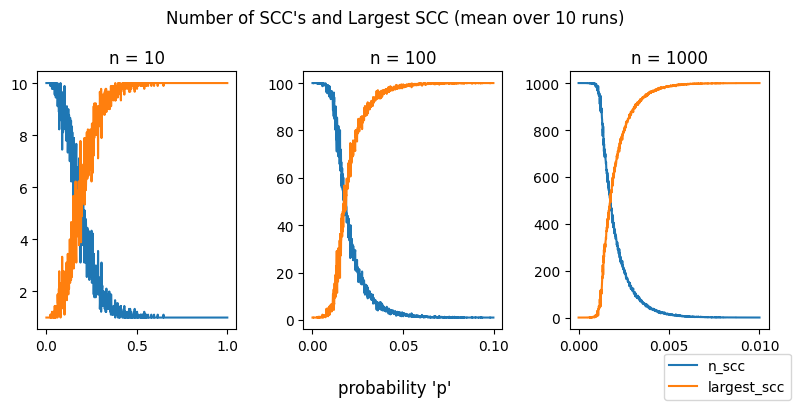

In [6]:
# plot number of strongly connected components and size of largest one
fig, axes = plt.subplots(1, 3, figsize=(8,4))

for n_fig, n in enumerate([10, 100, 1000]):
    p = data[n].index.values
    n_scc = data[n]["n_scc"]
    largest_scc = data[n]["largest_scc"]
    axes[n_fig].set_title(f"n = {n}")
    axes[n_fig].plot(p, n_scc, label="n_scc")
    axes[n_fig].plot(p, largest_scc, label="largest_scc")
handles, labels = axes[0].get_legend_handles_labels()

fig.suptitle('Number of SCC\'s and Largest SCC (mean over 10 runs)')
fig.supxlabel("probability 'p'")
fig.legend(handles, labels, loc="lower right")
fig.tight_layout()


# DBSCAN in 2-D random points

In [7]:
def plot_histogram(points, minPts, sample):
    n = len(points)
    dmatrix = np.empty(shape=(n,n))
    x = points['x']
    y = points['y']
    for i, j in np.ndindex(n, n):
        dmatrix[i][j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)


    dist = np.sort(np.sort(dmatrix)[:, :minPts].flatten())
    plt.hist(dist)
    
    plt.title(f"Distance to the {minPts} NN's in sample {sample}")
    plt.show()

def plot_clustering(points, eps, sample):
    for i in range(points['label'].max()):
        plt.scatter(points[points['label'] == i]['x'], points[points['label'] == i]['y'])
    plt.scatter(points[points['label'] == -1]['x'], points[points['label'] == -1]['y'], marker='*', c='black')
    
    plt.title(f"DBSCAN in sample {sample} with eps {eps}")
    plt.show()

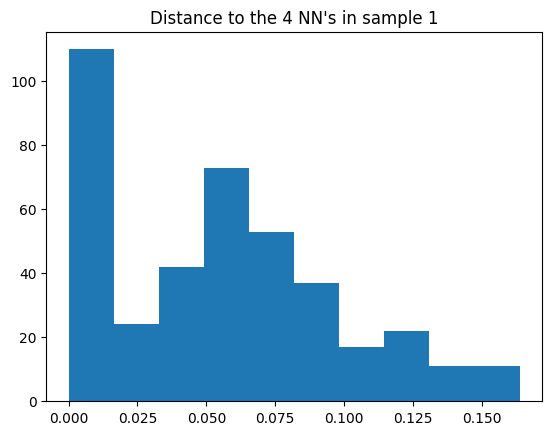

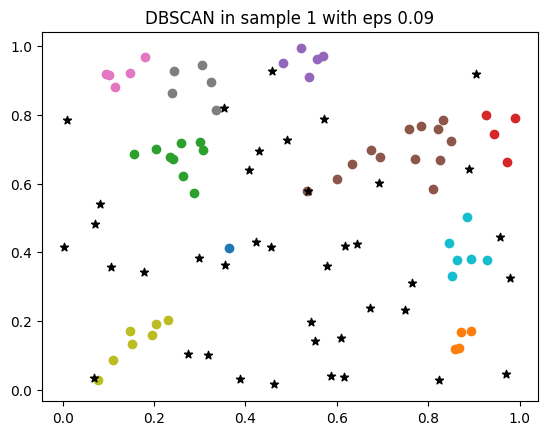

In [9]:
n = 100
minPts = 4
sample = 1
points = pd.read_csv(f"csv/points_XY_{n}_{minPts}_{sample}.csv")
plot_histogram(points, minPts, sample)
plot_clustering(points, 0.09, sample)